In [28]:
library(mixOmics)

In [29]:
meta_pd = read.csv("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/3batch_clinical_combined.csv")
rownames(meta_pd) = meta_pd$ID
# meta_pd_noout = meta_pd[meta_pd$Name!='MT107',]

In [30]:
cobre_pd = readRDS("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/Figure 1 Differential analysis/cobre_pd.rds")
rownames(cobre_pd) = cobre_pd$Sample_Name
cobre_pd[1:5,]

,Sample_Name,Sample_Plate,Sample_Group,Slide,Array,Mat_Ethnicity,Mat_Age,Net_Weight_Gain,Gravidity,Parity,Pat_Ethnicity,Gestational_Age,Hemoglobin,Sex
,<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
MT11,MT11,plate_3,control,200705420004,R01C01,A,37,29,3,2,A,39,11.9,F
MT12,MT12,plate_3,control,200705420004,R02C01,NHPI,17,20,1,0,NHPI,39,8.9,F
MT13,MT13,plate_3,obese,200705420004,R03C01,C,28,27,4,2,NHPI,39,10.9,F
MT14,MT14,plate_3,control,200705420004,R04C01,A,38,25,4,1,C,38,11.3,M
MT16,MT16,plate_3,obese,200705420004,R05C01,NHPI,33,23,4,More,NHPI,39,11.0,F


In [31]:
combat_edata3_vsn = readRDS('/nfs/dcmb-lgarmire/johntao/cordblood/META_3BATCH_NOOUT_log_stand_vsn_COMBAT.RDS')

In [32]:
load("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/RNA-seq analysis/RNA_normalized_log_counts.rdata",verbose=TRUE)

Loading objects:
  pd
  dds
  normalized_counts
  lognormalized_counts


In [8]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [9]:
dds <- DESeq(dds)
gene_deseq_res <- results(dds)
gene_deseq_res = gene_deseq_res[complete.cases(gene_deseq_res),]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 181 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [10]:
gene_deseq_res[1:5,]

log2 fold change (MLE): Sample Group obese vs control 
Wald test p-value: Sample Group obese vs control 
DataFrame with 5 rows and 6 columns
               baseMean log2FoldChange     lfcSE       stat    pvalue      padj
              <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
DDX11L1       1.4346230      -0.415249  0.481041 -0.8632302 0.3880109  0.999211
WASH7P      108.2621132      -0.102567  0.147323 -0.6962060 0.4862998  0.999211
MIR6859.1    12.2002795      -0.561372  0.244087 -2.2998841 0.0214548  0.999211
MIR1302.2HG   1.9859276      -0.708781  0.484771 -1.4620962 0.1437148  0.999211
OR4G11P       0.0502487      -0.202568  2.979340 -0.0679909 0.9457929  0.999211

In [11]:
cobre_methyl = readRDS('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_beta.rds')
cobre_methyl_sig = readRDS('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_limma_sig_1w5.RDS')
cobre_methyl_sig$CpGname = rownames(cobre_methyl_sig)

In [33]:
common_sample_id = intersect(intersect(rownames(combat_edata3_vsn), colnames(lognormalized_counts)),colnames(cobre_methyl))
#common_sample_id = intersect(rownames(meta_pd), colnames(lognormalized_counts))
length(common_sample_id)

[1] 42

In [13]:
anno = readRDS("/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/Figure 1 Differential analysis/FullAnnot_450k.rds")
anno = anno[complete.cases(anno),]
anno_gene_cobre_cpg_sig = merge(cobre_methyl_sig,anno,by.x='CpGname',by.y='Name')
rownames(anno_gene_cobre_cpg_sig) = anno_gene_cobre_cpg_sig$CpGname
anno_gene_cobre_cpg_sig[1:5,]

,CpGname,logFC,AveExpr,t,P.Value,adj.P.Val,B,Type,Relation_to_Island,UCSC_RefGene_Name,UCSC_RefGene_Group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
cg00000236,cg00000236,0.3341213,3.503037,3.728797,0.0004213042,0.02372594,-0.0698254,Hyper,OpenSea,VDAC3,3'UTR
cg00000905,cg00000905,0.3183030,-4.407947,3.371524,0.0012967274,0.04138640,-1.0732144,Hyper,OpenSea,FAM81A,Body
cg00002426,cg00002426,0.2685372,4.326287,3.482903,0.0009194484,0.03479293,-0.7673886,Hyper,S_Shore,SLMAP,1stExon
cg00005437,cg00005437,0.3355587,3.943229,4.071948,0.0001354854,0.01376491,0.9507926,Hyper,OpenSea,DRG2,3'UTR
cg00008629,cg00008629,0.2429488,1.229083,3.329623,0.0014733799,0.04410530,-1.1865465,Hyper,N_Shore,ROD1,Body


In [34]:
cobre_methyl[1:5,1:5]
lognormalized_counts[1:5,1:5]
combat_edata3_vsn[1:5,1:5]

,MT11,MT12,MT13,MT14,MT16
cg00000957,0.89436725,0.88491763,0.88994644,0.89859299,0.88706465
cg00001349,0.78620226,0.73032561,0.76520469,0.67338570,0.73514965
cg00001583,0.02574441,0.02275666,0.02626872,0.02250886,0.02562372
cg00002028,0.07665129,0.06678191,0.05678485,0.07445612,0.05591114
cg00002719,0.02831629,0.02230098,0.02178017,0.01563108,0.02869859


,MT11,MT12,MT14,MT16,MT18
DDX11L1,1.660986,0.000000,1.8348988,1.132549,0.000000
WASH7P,6.396597,6.681693,6.2375723,6.107899,5.806171
MIR6859.1,3.804669,3.749302,3.6983849,3.552391,1.677243
MIR1302.2HG,0.000000,0.000000,0.8920578,0.000000,0.000000
OR4G11P,0.000000,0.000000,0.0000000,0.000000,0.000000


,AlphaLactose,Arachidonicacid,Benzoicacid,BetaAlanine,C10
MT12,3.653201,2.889074,8.738785,0.4929149,-1.727032
MT13,-3.868160,3.078431,2.247363,0.5179790,-1.737499
MT15,3.279119,2.936538,7.385231,0.7503800,1.258743
MT16,3.437859,3.684814,7.161409,2.6736601,0.390930
MT18,3.493638,2.185320,6.829149,2.3711167,1.392094


In [35]:
cobre_methyl_commonsampmle_sigCpG = t(cobre_methyl[rownames(anno_gene_cobre_cpg_sig),common_sample_id])
cobre_gene_commonsampmle_sigCpG = t(lognormalized_counts[rownames(lognormalized_counts)%in%unique(anno_gene_cobre_cpg_sig$UCSC_RefGene_Name),common_sample_id])
cobre_metab_commonsampmle_sigCpG = combat_edata3_vsn[common_sample_id,]
cobre_pd_commonsampmle = cobre_pd[common_sample_id,]

In [16]:
cobre_gene_commonsampmle_sigCpG[1:5,]

,SAMD11,KLHL17,AGRN,C1orf159,MIR200B,TTLL10,SDF4,UBE2J2,TAS1R3,AURKAIP1,⋯,POFUT2,COL18A1,PCBP3,COL6A1,COL6A2,FTCD,PCNT,DIP2A,S100B,PRMT2
MT12,5.373491,6.897899,8.746222,8.257256,0.0000000,6.241974,11.58032,10.150846,5.260911,10.281636,⋯,9.401509,9.780720,7.356313,8.286308,10.012811,3.749302,11.24390,10.70567,4.509931,11.06476
MT16,6.004507,7.033179,9.063991,8.141698,0.0000000,7.033179,11.45044,9.922537,5.000176,9.847961,⋯,9.458114,9.450758,7.822567,8.345842,9.883000,5.570033,11.40295,11.07239,4.829166,10.89945
MT18,5.418362,5.748351,8.686698,8.101562,0.0000000,6.993158,11.23164,9.796133,5.418362,9.877613,⋯,9.526273,9.794349,7.493057,8.180200,10.040044,4.589806,11.53766,10.92331,4.522409,11.13059
MT25,6.746364,7.166343,8.206310,8.653003,0.8675215,6.913562,11.43296,9.806728,4.818101,10.037027,⋯,9.223897,9.965064,7.330540,9.090607,10.541985,4.377722,11.31559,10.85812,4.685703,10.81123
MT26,5.518492,7.168502,8.071404,8.630106,1.6255128,6.345050,11.55824,9.882115,4.305216,9.956676,⋯,9.759039,10.030453,6.930265,8.340986,9.874121,5.058556,11.22592,10.80436,4.144385,10.73721


In [17]:
dim(cobre_methyl_commonsampmle_sigCpG)
dim(cobre_gene_commonsampmle_sigCpG)
dim(cobre_metab_commonsampmle_sigCpG)
dim(cobre_pd_commonsampmle)

[1]    42 12565

[1]   42 6707

[1]  42 185

[1] 42 14

In [36]:
save(cobre_methyl_commonsampmle_sigCpG,
        cobre_gene_commonsampmle_sigCpG,
        cobre_metab_commonsampmle_sigCpG,
        cobre_pd_commonsampmle,
     file='COBRE_3batch_commonsample_sig_subset+PD.rdata')

In [37]:
quantile(cobre_methyl_commonsampmle_sigCpG)
quantile(cobre_gene_commonsampmle_sigCpG)
quantile(cobre_metab_commonsampmle_sigCpG)

0%          25%          50%          75%         100% 
7.483668e-05 2.743025e-02 7.104272e-02 8.980303e-01 9.951783e-01

0%       25%       50%       75%      100% 
 0.000000  4.700747  8.579693 10.241278 16.771019

0%         25%         50%         75%        100% 
-11.5103077   0.8884434   4.7840296   7.1756336  16.3614399

In [38]:
gene_zero_var = apply(t(cobre_gene_commonsampmle_sigCpG), 1, var)==0
names(gene_zero_var[gene_zero_var==TRUE])

[1] "IGSF21"  "OTOS"    "EIF4E1B" "PIP"     "C8orf74" "MYPN"    "KRT7"   
[8] "MIR493"

In [39]:
cobre_gene_commonsampmle_sigCpG_nonzero = cobre_gene_commonsampmle_sigCpG[,
                                                colnames(cobre_gene_commonsampmle_sigCpG)%in%names(gene_zero_var[gene_zero_var==FALSE])]

In [40]:
dim(cobre_gene_commonsampmle_sigCpG_nonzero)

[1]   42 6699

In [41]:
X <- list(Methylation = cobre_methyl_commonsampmle_sigCpG, 
          Gene = cobre_gene_commonsampmle_sigCpG_nonzero, 
          Metabolomics = cobre_metab_commonsampmle_sigCpG)

Y <- cobre_pd_commonsampmle$Sample_Group

# Run DIABLO

# Multiblock PLS-DA

In [42]:
result.diablo.tcga <- block.plsda(X, Y) # run the method

In [43]:
save(result.diablo.tcga,file='3batch_diablo_result_vsn.rdata')

In [44]:
load('3batch_diablo_result_vsn.rdata')

In [45]:
#is(result.diablo.tcga,'sgcca')

result.diablo.tcga


Call:
 block.plsda(X = X, Y = Y) 

 sGCCA with 2 components on block 1 named Methylation 
 sGCCA with 2 components on block 2 named Gene 
 sGCCA with 2 components on block 3 named Metabolomics 
 sGCCA with 2 components on the outcome Y

 Dimension of block 1 is  42 12565 
 Dimension of block 2 is  42 6699 
 Dimension of block 3 is  42 185 
 Outcome Y has 2 levels 

 Selection of 12565 12565 variables on each of the sGCCA components on the block 1 
 Selection of 6699 6699 variables on each of the sGCCA components on the block 2 
 Selection of 185 185 variables on each of the sGCCA components on the block 3 

 Main numerical outputs: 
 -------------------- 
 loading vectors: see object$loadings 
 variates: see object$variates 
 variable names: see object$names 

 Functions to visualise samples: 
 -------------------- 
 plotIndiv, plotArrow, cimDiablo, plotDiablo 

 Functions to visualise variables: 
 -------------------- 
 plotVar, plotLoadings, network, circosPlot 

 Other functions: 


In [47]:
pdf('plotIndiv_diablo_3batch_clustering_vsn.pdf')
plotIndiv(result.diablo.tcga) # plot the samples
dev.off()

png 
  2

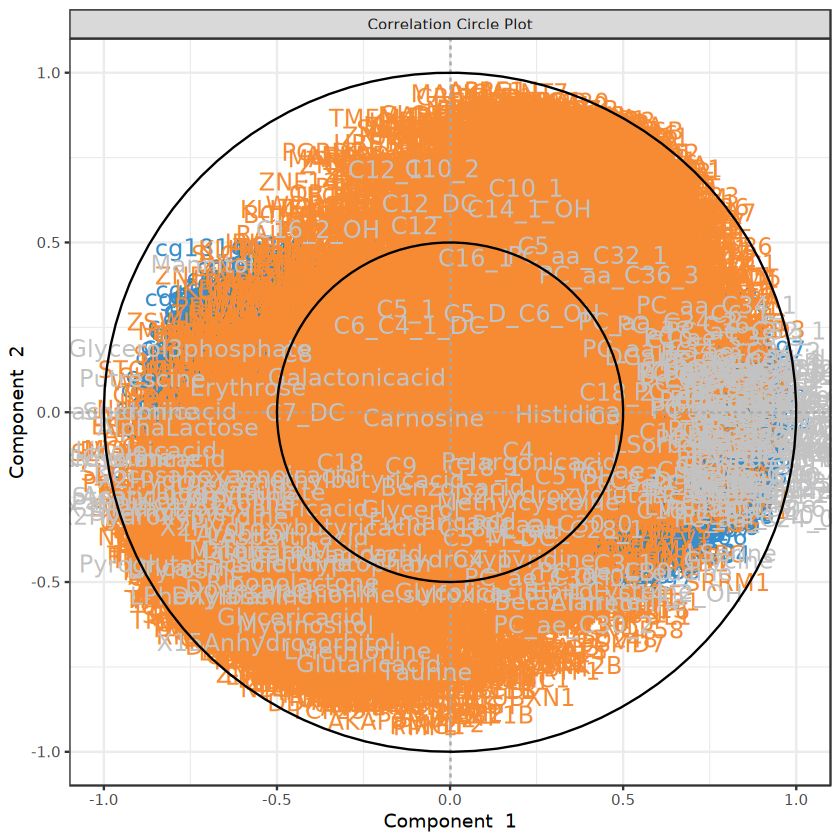

In [78]:
plotVar(result.diablo.tcga)

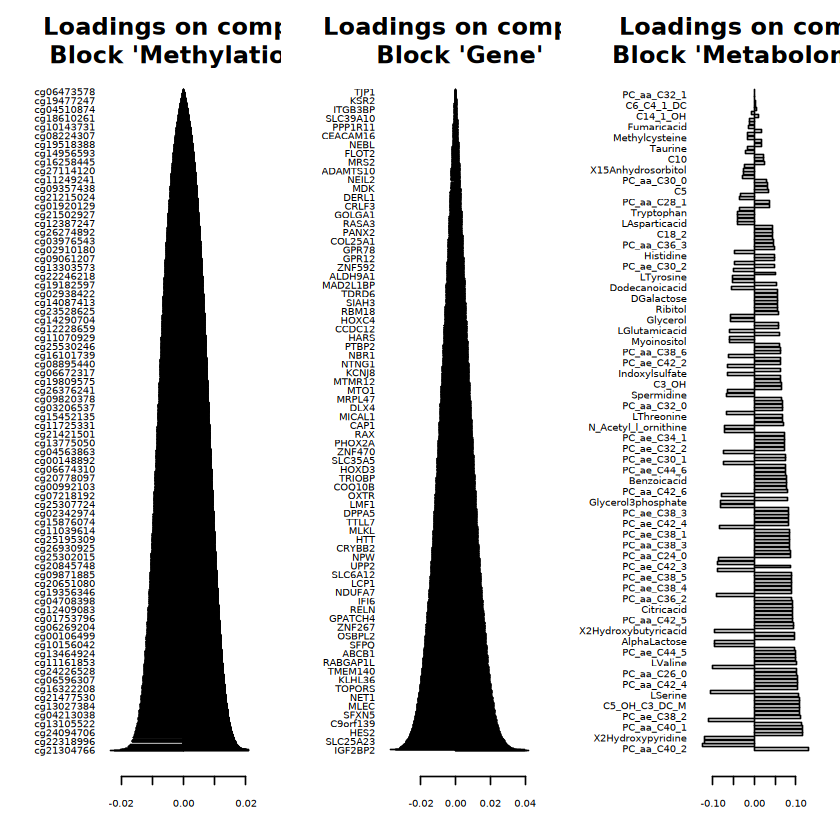

In [80]:
plotLoadings(result.diablo.tcga, ncomp = 1) 

In [7]:
methylloading = as.data.frame(result.diablo.tcga$loadings$Methylation)
geneloading = as.data.frame(result.diablo.tcga$loadings$Gene)
metabloading = as.data.frame(result.diablo.tcga$loadings$Metabolomics)
methylloading$Name = rownames(methylloading)
geneloading$Name = rownames(geneloading)
metabloading$Name = rownames(metabloading)

In [82]:
saveRDS(result.diablo.tcga,'diablo_3batch_3omics_final_datablock_vsn.rds')

In [24]:
dim(df_methyl_anno)
dim(df_gene_loading200)
dim(df_metab_loading)

[1] 150  21

[1] 150   8

[1] 150   8

In [25]:
#methylation: 12565 
#gene: 6699 
#metabolite: 185 

#methylation: 12565 
i=1
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 12565)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_methyl_loading_all = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')

#gene: 6699 
i=2
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 6699)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_gene_loading_all = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')

#metabolite: 185 
i=3
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 185)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_metab_loading_all = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')


In [27]:
df_methyl_loading_all$CpG = rownames(df_methyl_loading_all)
df_gene_loading_all$Gene = rownames(df_gene_loading_all)
df_metab_loading_all$Metabolite = rownames(df_metab_loading_all)

In [30]:
df_methyl_anno_all = merge(anno_gene_cobre_cpg_sig,df_methyl_loading_all,by=0)
rownames(df_methyl_anno_all) = df_methyl_anno_all$Row.names
df_methyl_anno_all$CpG_anno = paste0(df_methyl_anno_all$UCSC_RefGene_Name,' / ',df_methyl_anno_all$CpG)

In [31]:
df_gene_anno_all = merge(df_gene_loading_all,as.data.frame(gene_deseq_res),by=0)
rownames(df_gene_anno_all) = df_gene_anno_all$Row.names
#df_gene_anno_all[1:5,]

In [33]:
load('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/metabolite_de_allg.limma_vsn.rdata')
df_metab_anno_all = merge(df_metab_loading_all,as.data.frame(allg.limma_vsn),by=0)
rownames(df_metab_anno_all) = df_metab_anno_all$Row.names
#df_metab_anno_all[1:5,]

In [34]:
save(df_methyl_anno_all,df_gene_anno_all,df_metab_anno_all,file='final_all_annotated_3omics_diablo_loadings.rdata')

In [8]:
#methylation top50 
i=1
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 50)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_methyl_loading_50 = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')

#methylation top50 
i=1
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 150)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_methyl_loading_150 = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')

#methylation top500 
i=1
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 500)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_methyl_loading_500 = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')

In [9]:
#gene top 50
i=2
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 50)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_gene_loading_50 = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')

#gene top 150
i=2
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 150)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_gene_loading_150 = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')

#gene top 500
i=2
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 500)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_gene_loading_500 = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')

In [11]:
#metabolomics top 50
i=3
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 50)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_metab_loading_50 = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')

#metabolomics top 150
i=3
block = c(1,2,3)
res = mixOmics:::get.loadings.ndisplay(object = result.diablo.tcga, comp = 1, block = block[i], name.var = NULL, 
                            name.var.complete = FALSE, ndisplay = 150)
X = res$X
names.block = res$names.block
colnames.X = res$colnames.X
name.selected.var = res$name.selected.var
value.selected.var = res$value.selected.var
Y = result.diablo.tcga$Y
df_metab_loading_150 = mixOmics:::get.contrib.df(Y = Y, X = X, method = 'median', 
                    contrib = 'max', value.selected.var = value.selected.var, 
                    colnames.X = colnames.X, name.selected.var = name.selected.var, 
                    legend.color = NULL, col.ties = 'white')


In [12]:
df_methyl_loading_50$CpG = rownames(df_methyl_loading_50)
df_gene_loading_50$Gene = rownames(df_gene_loading_50)
df_metab_loading_50$Metabolite = rownames(df_metab_loading_50)

df_methyl_loading_150$CpG = rownames(df_methyl_loading_150)
df_gene_loading_150$Gene = rownames(df_gene_loading_150)
df_metab_loading_150$Metabolite = rownames(df_metab_loading_150)

df_methyl_loading_500$CpG = rownames(df_methyl_loading_500)
df_gene_loading_500$Gene = rownames(df_gene_loading_500)
df_metab_loading_150$Metabolite = rownames(df_metab_loading_150)

In [73]:
df_methyl_loading_50[1:3,]
df_gene_loading_50[1:3,]
df_metab_loading_50[1:3,]

,control,obese,Contrib.control,Contrib.obese,Contrib,GroupContrib,importance,CpG
,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>
cg25928881,0.4476732,-0.07172219,TRUE,FALSE,FALSE,control,-0.02544161,cg25928881
cg21304766,0.4347636,-0.23537341,TRUE,FALSE,FALSE,control,-0.02487672,cg21304766
cg16683741,0.4857847,-0.24545097,TRUE,FALSE,FALSE,control,-0.02333547,cg16683741


,control,obese,Contrib.control,Contrib.obese,Contrib,GroupContrib,importance,Gene
,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>
IGF2BP2,-0.4528933,0.2508366,FALSE,TRUE,FALSE,obese,0.04046632,IGF2BP2
MDC1,-0.3812267,0.2514119,FALSE,TRUE,FALSE,obese,0.03833190,MDC1
CMIP,-0.4028995,0.1529083,FALSE,TRUE,FALSE,obese,0.03771776,CMIP


,control,obese,Contrib.control,Contrib.obese,Contrib,GroupContrib,importance,Metabolite
,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>
Oleicacid,0.3811165,-0.3473802,TRUE,FALSE,FALSE,control,-0.2217672,Oleicacid
X2Hydroxypyridine,0.4244464,-0.2577739,TRUE,FALSE,FALSE,control,-0.2158673,X2Hydroxypyridine
Galactonicacid,-0.6889263,0.3494169,FALSE,TRUE,FALSE,obese,0.1835455,Galactonicacid


In [59]:
library(ggpubr)

In [217]:
typeof(res)

[1] "S4"

In [215]:
res[c('SRRM1', 'CASC3', 'IGF2BP1', 'IGF2BP2', 'POLR2A', 'POLR2H', 'HNRNPC','CEBPA', 'ZNF423', 'GATA3'),]

log2 fold change (MLE): Sample Group obese vs control 
Wald test p-value: Sample Group obese vs control 
DataFrame with 10 rows and 6 columns
          baseMean log2FoldChange     lfcSE      stat      pvalue      padj
         <numeric>      <numeric> <numeric> <numeric>   <numeric> <numeric>
SRRM1    5177.7068      0.2710046 0.0909147   2.98087 0.002874341  0.971021
CASC3    3709.6489      0.0905096 0.0412000   2.19683 0.028032262  0.999211
IGF2BP1  1134.1437      0.5596365 0.1591049   3.51741 0.000435788  0.575076
IGF2BP2  4968.9804      0.2024777 0.0622509   3.25261 0.001143516  0.735812
POLR2A   9147.2938      0.3055816 0.1106387   2.76198 0.005745257  0.999211
POLR2H    640.3129     -0.1359461 0.0877657  -1.54897 0.121389867  0.999211
HNRNPC  16318.0711      0.1782945 0.0711914   2.50444 0.012264551  0.999211
CEBPA     332.6513     -0.2774876 0.1798367  -1.54300 0.122831249  0.999211
ZNF423     45.4699      0.2546405 0.1579364   1.61230 0.106897072  0.999211
GATA3     289.6649    

In [23]:
df_methyl_anno_50 = merge(anno_gene_cobre_cpg_sig,df_methyl_loading_50,by=0)
rownames(df_methyl_anno_50) = df_methyl_anno_50$Row.names

df_methyl_anno_150 = merge(anno_gene_cobre_cpg_sig,df_methyl_loading_150,by=0)
rownames(df_methyl_anno_150) = df_methyl_anno_150$Row.names

df_methyl_anno_500 = merge(anno_gene_cobre_cpg_sig,df_methyl_loading_500,by=0)
rownames(df_methyl_anno_500) = df_methyl_anno_500$Row.names

In [24]:
df_methyl_anno_50[1:5,]

,Row.names,CpGname,logFC,AveExpr,t,P.Value,adj.P.Val,B,Type,Relation_to_Island,UCSC_RefGene_Name,UCSC_RefGene_Group,control,obese,Contrib.control,Contrib.obese,Contrib,GroupContrib,importance,CpG
,<I<chr>>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>
cg00021945,cg00021945,cg00021945,0.4085327,-5.762927,4.072647,1.351658e-04,0.0137497253,0.9529235,Hyper,OpenSea,ZNF613,5'UTR,-0.4674875,0.7079911,FALSE,TRUE,FALSE,obese,0.01999823,cg00021945
cg00341950,cg00341950,cg00341950,-0.6532488,5.116978,-4.181748,9.327928e-05,0.0115235678,1.2879126,Hypo,Island,BRSK2,Body,0.3471954,-0.2578063,TRUE,FALSE,FALSE,control,-0.02239741,cg00341950
cg00356213,cg00356213,cg00356213,0.5008016,-6.411321,3.309582,1.565692e-03,0.0453932291,-1.2404172,Hyper,Island,STOML2,TSS1500,-0.3608793,0.2352921,FALSE,TRUE,FALSE,obese,0.02270650,cg00356213
cg00666978,cg00666978,cg00666978,0.4557128,-5.386582,3.998954,1.731831e-04,0.0155390056,0.7294005,Hyper,Island,LASS2,TSS200,-0.3218724,0.4716872,FALSE,TRUE,FALSE,obese,0.01958245,cg00666978
cg02186441,cg02186441,cg02186441,0.7591049,-6.359297,5.738262,3.134591e-07,0.0007112851,6.4698975,Hyper,Island,C2orf86,1stExon,-0.5574868,0.3333719,FALSE,TRUE,FALSE,obese,0.02085130,cg02186441


In [25]:
df_methyl_anno_50$CpG_anno = paste0(df_methyl_anno_50$UCSC_RefGene_Name,' / ',df_methyl_anno_50$CpG)
df_methyl_anno_150$CpG_anno = paste0(df_methyl_anno_150$UCSC_RefGene_Name,' / ',df_methyl_anno_150$CpG)
df_methyl_anno_500$CpG_anno = paste0(df_methyl_anno_500$UCSC_RefGene_Name,' / ',df_methyl_anno_500$CpG)

In [78]:
dim(df_methyl_anno_50)

[1] 50 21

In [79]:
df_methyl_anno_50[df_methyl_anno_50$UCSC_RefGene_Name%in%c('EPO', 'CSF1','FOXO1', 'LEP','PGF'),][,c(2,3,4,6,7,12,19,21)]

,CpGname,logFC,AveExpr,P.Value,adj.P.Val,UCSC_RefGene_Group,importance,CpG_anno
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
cg10864074,cg10864074,0.4378238,-5.504366,1.119213e-04,0.012545254,TSS1500,0.01931116,EPO / cg10864074
cg16683741,cg16683741,-0.3937668,3.401146,1.702525e-05,0.005097215,5'UTR,-0.02333547,LEP / cg16683741
cg21288729,cg21288729,0.6404897,-5.999201,2.495598e-05,0.006138695,Body,0.02081992,FOXO1 / cg21288729
cg23089438,cg23089438,0.5478574,-6.230249,4.974186e-04,0.025764110,5'UTR,0.02307058,CSF1 / cg23089438


In [80]:
p1_methyl_imp = ggplot(df_methyl_anno_50, aes(x = reorder(CpG_anno,abs(importance)), y = importance,fill=GroupContrib)) +
  geom_bar(stat = "identity",width=0.3) +
  xlab("Loading Importance") +
  ylab("CpG") +
coord_flip()+
scale_fill_manual(values=c("#E69138", "#3D85C6"))+
theme_minimal()

p2_gene_imp = ggplot(df_gene_loading_50, aes(x = reorder(Gene,abs(importance)), y = importance,fill=GroupContrib)) +
  geom_bar(stat = "identity",width=0.3) +
  xlab("Loading Importance") +
  ylab("Gene") +
coord_flip()+
scale_fill_manual(values=c("#E69138", "#3D85C6"))+
theme_minimal()

p3_metab_imp = ggplot(df_metab_loading_50, aes(x = reorder(Metabolite,abs(importance)), y = importance,fill=GroupContrib)) +
  geom_bar(stat = "identity",width=0.3) +
  xlab("Loading Importance") +
  ylab("Metabolite") +
coord_flip()+
scale_fill_manual(values=c("#E69138", "#3D85C6"))+
theme_minimal()

In [81]:
pdf('New_3batch_loadings_importance_diablo_top50_vsn.pdf',width=12)
ggarrange(p1_methyl_imp,p2_gene_imp,p3_metab_imp,  ncol = 3, labels = c("A","B", "C"), 
          widths = c(1.1,1,1.3),common.legend = TRUE, legend="right" )
dev.off()

png 
  2

In [84]:
save(df_methyl_anno_50,df_gene_loading_50,df_metab_loading_50,file='diablo_final_3omics_loadings_df_50_vsn.rdata')
save(df_methyl_anno_150,df_gene_loading_150,df_metab_loading_150,file='diablo_final_3omics_loadings_df_150_vsn.rdata')

In [11]:
load('diablo_final_3omics_loadings_df_50_vsn.rdata')
load('diablo_final_3omics_loadings_df_150_vsn.rdata')

In [12]:
df_gene_loading_50[1:3,]
gene_deseq_res[1:3,]

,control,obese,Contrib.control,Contrib.obese,Contrib,GroupContrib,importance,Gene
,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>
IGF2BP2,-0.4528933,0.2508366,FALSE,TRUE,FALSE,obese,0.04046632,IGF2BP2
MDC1,-0.3812267,0.2514119,FALSE,TRUE,FALSE,obese,0.03833190,MDC1
CMIP,-0.4028995,0.1529083,FALSE,TRUE,FALSE,obese,0.03771776,CMIP


log2 fold change (MLE): Sample Group obese vs control 
Wald test p-value: Sample Group obese vs control 
DataFrame with 3 rows and 6 columns
           baseMean log2FoldChange     lfcSE      stat    pvalue      padj
          <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
DDX11L1     1.43462      -0.415249  0.481041 -0.863230 0.3880109  0.999211
WASH7P    108.26211      -0.102567  0.147323 -0.696206 0.4862998  0.999211
MIR6859.1  12.20028      -0.561372  0.244087 -2.299884 0.0214548  0.999211

In [26]:
df_gene_anno_150 = merge(df_gene_loading_150,as.data.frame(gene_deseq_res),by=0)
rownames(df_gene_anno_150) = df_gene_anno_150$Row.names
df_gene_anno_150[1:5,]

df_gene_anno_500 = merge(df_gene_loading_500,as.data.frame(gene_deseq_res),by=0)
rownames(df_gene_anno_500) = df_gene_anno_500$Row.names
df_gene_anno_500[1:5,]

,Row.names,control,obese,Contrib.control,Contrib.obese,Contrib,GroupContrib,color,importance,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<I<chr>>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<named list>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACOX3,ACOX3,0.2707704,-0.14260825,TRUE,FALSE,FALSE,control,,-0.03132880,ACOX3,284.25845,-0.2197054,0.06448055,-3.407313,0.0006560575,0.6156443
ANKS3,ANKS3,0.2171801,0.07154633,TRUE,FALSE,FALSE,control,,-0.02926041,ANKS3,376.63697,-0.1216622,0.10179965,-1.195115,0.2320422975,0.9992105
ARFRP1,ARFRP1,0.1743996,0.11289662,TRUE,FALSE,FALSE,control,,-0.02674917,ARFRP1,481.16292,-0.1217734,0.09895963,-1.230536,0.2184965419,0.9992105
ATG7,ATG7,0.5858616,-0.27459503,TRUE,FALSE,FALSE,control,,-0.03171238,ATG7,277.72372,-0.1437207,0.04842229,-2.968069,0.0029967670,0.9747935
ATP1B2,ATP1B2,-0.2200017,0.52467890,FALSE,TRUE,FALSE,obese,,0.02603012,ATP1B2,32.81774,0.9737798,0.25883900,3.762106,0.0001684885,0.4105353


,Row.names,control,obese,Contrib.control,Contrib.obese,Contrib,GroupContrib,color,importance,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<I<chr>>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<named list>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AACS,AACS,0.30722972,0.01617210,TRUE,FALSE,FALSE,control,,-0.02368618,AACS,526.0300,-0.1318110,0.08016293,-1.644289,0.1001164714,0.9992105
ABHD5,ABHD5,-0.27873366,0.06346979,FALSE,TRUE,FALSE,obese,,0.02352082,ABHD5,264.0777,0.1622805,0.08125014,1.997295,0.0457931012,0.9992105
ABHD8,ABHD8,0.17719823,-0.16190293,TRUE,FALSE,FALSE,control,,-0.02299164,ABHD8,283.2030,-0.1347495,0.10216080,-1.318994,0.1871710301,0.9992105
ACOX3,ACOX3,0.27077035,-0.14260825,TRUE,FALSE,FALSE,control,,-0.03132880,ACOX3,284.2584,-0.2197054,0.06448055,-3.407313,0.0006560575,0.6156443
AEN,AEN,0.07662788,-0.07862828,TRUE,FALSE,FALSE,control,,-0.02199727,AEN,475.4010,-0.1169595,0.09595092,-1.218951,0.2228628251,0.9992105


In [27]:
load('/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/metabolite_de_allg.limma_vsn.rdata')
allg.limma_vsn[1:5,]
df_metab_loading_150[1:5,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PC_ae_C40_3,0.4171703,2.930850,3.595853,0.0006723465,0.1243841,-0.5195129
PC_aa_C38_3,0.3896984,7.881472,3.272969,0.0018032761,0.1668030,-1.3149108
PC_aa_C40_3,0.2922056,2.778838,3.108802,0.0029193666,0.1800276,-1.7010417
C16_1_OH,-0.7744639,-2.649365,-2.870075,0.0057326809,0.2136258,-2.2383474
Uricacid,-1.1039821,8.197889,-2.867493,0.0057736696,0.2136258,-2.2439935


,control,obese,Contrib.control,Contrib.obese,Contrib,GroupContrib,importance,Metabolite
,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>
Oleicacid,0.38111652,-0.3473802,TRUE,FALSE,FALSE,control,-0.2217672,Oleicacid
X2Hydroxypyridine,0.42444641,-0.2577739,TRUE,FALSE,FALSE,control,-0.2158673,X2Hydroxypyridine
Galactonicacid,-0.68892629,0.3494169,FALSE,TRUE,FALSE,obese,0.1835455,Galactonicacid
C5,-0.17069790,0.1564817,FALSE,TRUE,FALSE,obese,0.1751733,C5
C12,-0.03494764,0.2453254,FALSE,TRUE,FALSE,obese,0.1725711,C12


In [28]:
df_metab_anno_150 = merge(df_metab_loading_150,as.data.frame(allg.limma_vsn),by=0)
rownames(df_metab_anno_150) = df_metab_anno_150$Row.names
df_metab_anno_150[1:5,]

,Row.names,control,obese,Contrib.control,Contrib.obese,Contrib,GroupContrib,importance,Metabolite,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<I<chr>>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AlphaLactose,AlphaLactose,0.3201650,0.10141433,TRUE,FALSE,FALSE,control,-0.03270416,AlphaLactose,-0.54452497,3.368703,-0.9901306,0.32625756,0.7273436,-5.192800
Arachidonicacid,Arachidonicacid,0.4197927,-0.14594745,TRUE,FALSE,FALSE,control,-0.07157474,Arachidonicacid,-0.86120586,3.306119,-2.1520600,0.03560268,0.4671613,-3.657363
Benzoicacid,Benzoicacid,0.1706435,0.32157087,FALSE,TRUE,FALSE,obese,0.08192314,Benzoicacid,0.69376870,6.090273,1.2959015,0.20018583,0.6442983,-4.890576
BetaAlanine,BetaAlanine,0.1170776,0.24740592,FALSE,TRUE,FALSE,obese,0.07695980,BetaAlanine,0.05501562,3.215659,0.2909812,0.77211248,0.8872100,-5.586081
C10,C10,0.1708590,0.08740008,TRUE,FALSE,FALSE,control,0.11257819,C10,-0.10436399,-2.134647,-0.3356083,0.73838744,0.8872100,-5.573699


In [29]:
save(df_methyl_anno_500,df_gene_anno_500,df_metab_anno_150,file='diablo_final_3omics_loadings_withannotation_500_vsn.rdata')

In [21]:
save(df_methyl_anno_150,df_gene_anno_150,df_metab_anno_150,file='diablo_final_3omics_loadings_withannotation_150_vsn.rdata')

In [133]:
pdf('diablo_plsda_loadings200_3batch.pdf',height=6)
plotLoadings(result.diablo.tcga,ndisplay=100,#layout=c(1,3), 
             subtitle = c('Methylation', 'Gene','Metabolomics'), contrib = 'max', method = 'median',size.name=1) 
dev.off()

png 
  2

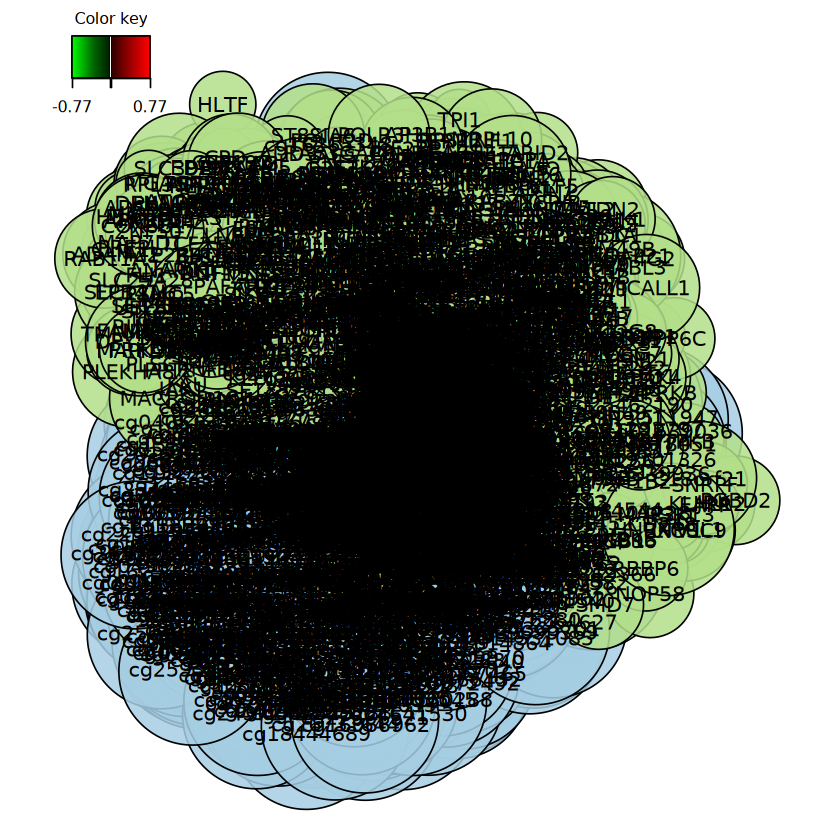

In [83]:
network(result.diablo.tcga, cutoff = 0.6) #max value in the similarity matrix which is 0.77

In [84]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




0%       25%       50%       75%      100% 
0.5000002 0.5126381 0.5293277 0.5554766 0.7747070

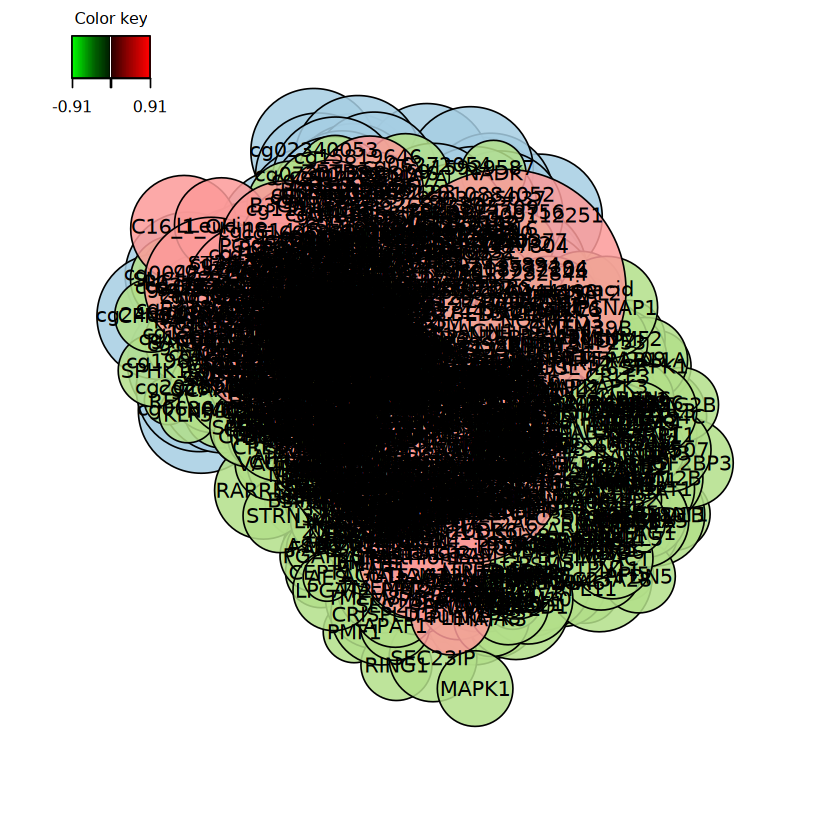

In [102]:
network.res3block <- network(result.diablo.tcga,blocks=c(1,2,3), cutoff = 0.7,plot.graph=FALSE)
quantile(abs(as_data_frame(network.res$gR, what = c("edges"))$weight))

In [103]:
edges7_3block = as_data_frame(network.res3block$gR, what = c("edges"))
nodes7_3block = as_data_frame(network.res3block$gR, what = c("vertices"))
write.csv(edges7_3block,'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_3batch_diablo_edges0.7_3block.csv',quote=FALSE)
write.csv(nodes7_3block,'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_3batch_diablo_nodes0.7_3block.csv',quote=FALSE)

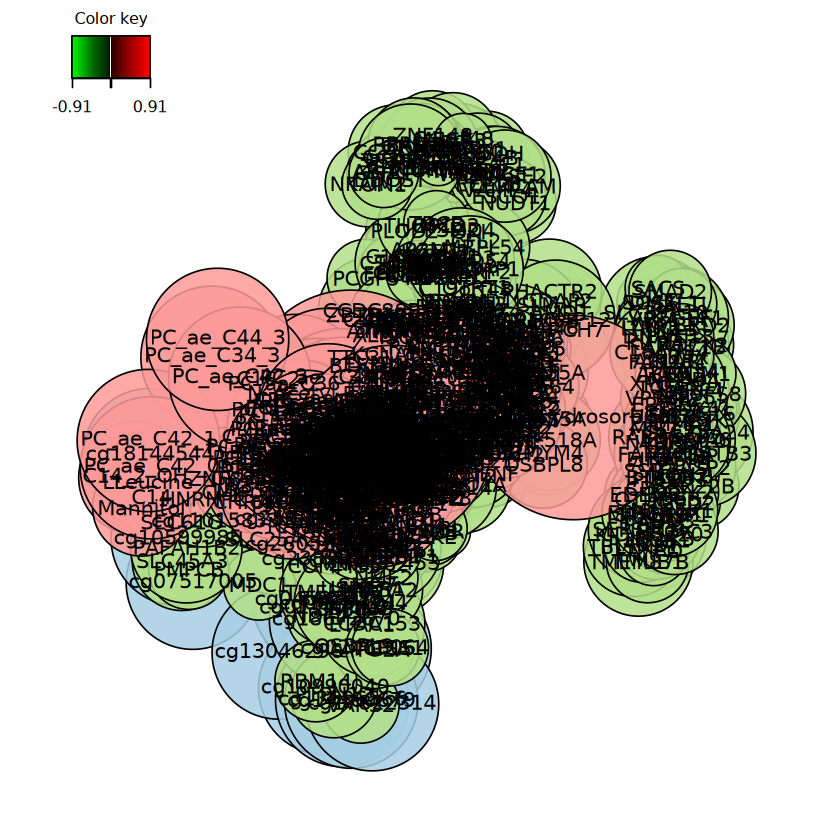

In [104]:
network.res3block75 <- network(result.diablo.tcga,blocks=c(1,2,3), cutoff = 0.75,plot.graph=FALSE)
edges75_3block = as_data_frame(network.res3block75$gR, what = c("edges"))
nodes75_3block = as_data_frame(network.res3block75$gR, what = c("vertices"))
write.csv(edges75_3block,'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_3batch_diablo_edges0.75_3block.csv',quote=FALSE)
write.csv(nodes75_3block,'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_3batch_diablo_nodes0.75_3block.csv',quote=FALSE)

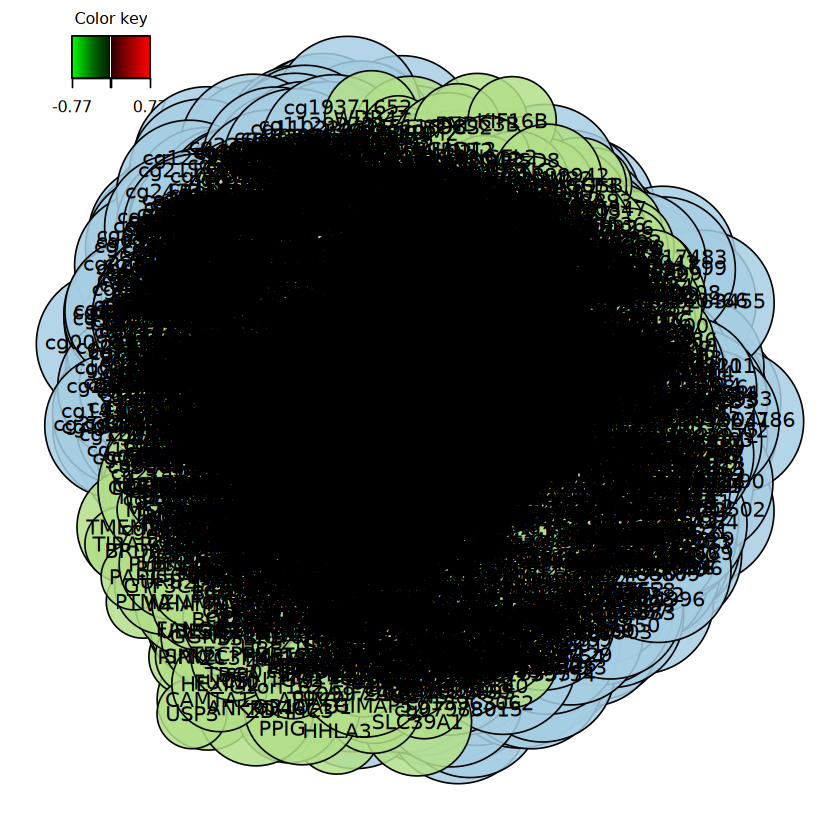

In [86]:
network.res <- network(result.diablo.tcga, cutoff = 0.5)
edges = as_data_frame(network.res$gR, what = c("edges"))
nodes = as_data_frame(network.res$gR, what = c("vertices"))
write.csv(edges,'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_3batch_diablo_edges0.5.csv',quote=FALSE)
write.csv(nodes,'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_3batch_diablo_nodes0.5.csv',quote=FALSE)

In [88]:
quantile(edges$weight)

0%        25%        50%        75%       100% 
-0.7747070 -0.5384179 -0.5087363  0.5186409  0.7671516

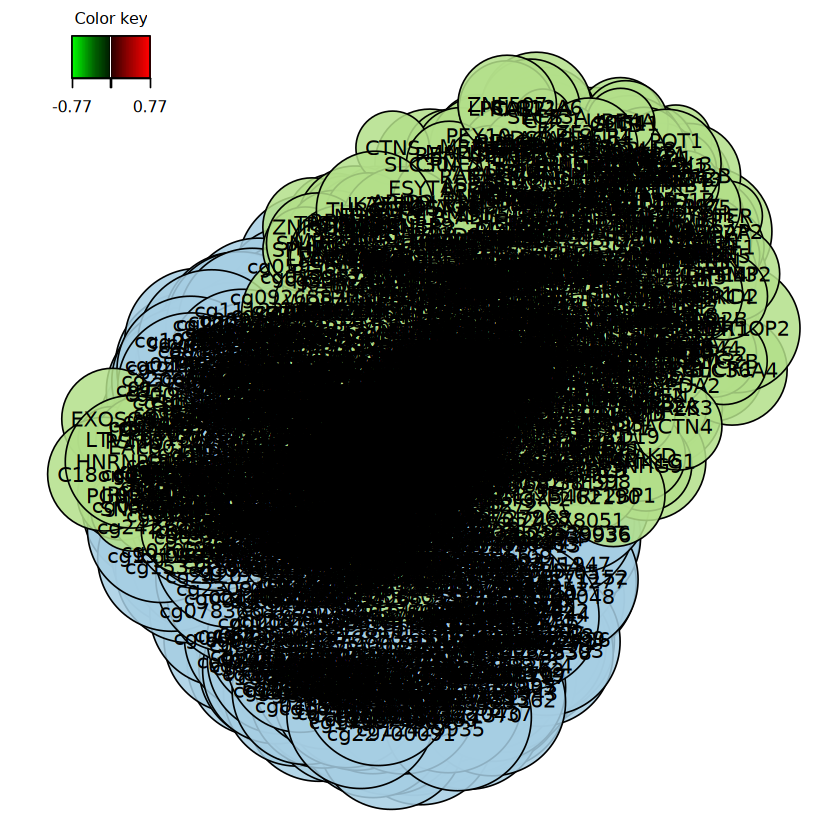

In [89]:
network.res6 <- network(result.diablo.tcga, cutoff = 0.6)
edges6 = as_data_frame(network.res6$gR, what = c("edges"))
nodes6 = as_data_frame(network.res6$gR, what = c("vertices"))
write.csv(edges6,'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_3batch_diablo_edges0.6.csv',quote=FALSE)
write.csv(nodes6,'/nfs/dcmb-lgarmire/yhdu/COBRE Final Documents/meta_analysis/cobre_3batch_diablo_nodes0.6.csv',quote=FALSE)